In [224]:
import numpy as np
import matplotlib.pyplot as plt
from ecit import *
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns



def show_results(results, ensembles, n_list):

    dir = {}

    # 处理每个 ensemble 的结果
    for (p_ensemble, k), result in zip(ensembles, results):
        if k == 0:
            eI, eII, tim = result
            num_ = np.sum(np.array(eI) < 1)
            eI = eI[:num_]
            eII = eII[:num_]
            tim = tim[:num_]
            result = [eI, eII, tim]
        if k==0: key_name='KCIT'
        elif k==1: key_name='RCIT'
        elif p_ensemble.__name__ == 'p_alpha175':
            key_name=r"EKCIT ($\alpha=1.75$)"
        else:
            key_name=r"EKCIT ($\alpha=2.00$)"
        dir[key_name] = result

    # 创建 2x2 的子图
    fig, axes = plt.subplots(2, 2, figsize=(7, 5), dpi=1000, sharex=True)
    (ax_eI, ax_eSum), (ax_eII, ax_tim) = axes

    # 线条样式、标记、颜色的选择
    linestyles = ['--', ':', '-', '-.']  # 线型
    markers = ['^', 'o', 's', 'D']      # 标记
    colors = ["#cf444d", "#ff6969", sns.color_palette("muted")[0], sns.color_palette("muted")[9]]  # 颜色
    alphas = [0.95, 1, 0.95, 0.95]
    markersize = 4.2
    linewidth = 1.3
    # 绘制每个结果
    for idx, (label, result) in enumerate(dir.items()):
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)
        eII = 1 - np.array(eII)
        # 选择线型、标记和颜色
        linestyle = linestyles[idx % len(linestyles)]  # 循环使用线型
        marker = markers[idx % len(markers)]  # 循环使用标记
        color = colors[idx % len(colors)]  # 循环使用颜色
        alpha = alphas[idx % len(alphas)]

        # 确保 x 轴与结果长度一致
        x_vals = n_list[:len(eI)] if len(eI) != len(n_list) else n_list

        # 设置 label 来显示图例
        ax_eI.plot(x_vals, eI, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)
        ax_eII.plot(x_vals, eII, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)
        ax_eSum.plot(x_vals, eSum, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)
        ax_tim.plot(x_vals, np.array(tim)/100, alpha=alpha, label=label, linestyle=linestyle, marker=marker, markersize=markersize, linewidth=linewidth, color=color)

    
    


    # 设置每个子图的标题和标签
    ax_eI.set_title("Type I Error", fontsize=12)
    ax_eI.set_ylabel("Error Rate", fontsize=11)

    ax_eII.set_title("Power", fontsize=12)
    ax_eII.set_ylabel("Power", fontsize=11)
    ax_eII.set_xlabel("Sample Size (n)", fontsize=11)   

    ax_eSum.set_title("Overall Error", fontsize=12)
    #ax_eSum.set_ylabel("Error Rate", fontsize=11)

    ax_tim.set_title("Execution Time", fontsize=12)
    ax_tim.set_ylabel("Time (s)", fontsize=11)
    ax_tim.set_xlabel("Sample Size (n)", fontsize=11)

    # 设置坐标轴刻度
    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)
    ax_eII.set_xticks(n_list)
    ax_eI.set_xticks(n_list)


    ax_eI.axhline(y=0.05, color='black', linestyle='-', alpha=0.4, linewidth = 0.6)

    for ax in [ax_eI, ax_eII, ax_eSum, ax_tim]:
        ax.set_xticklabels(n_list, rotation=45)
        ax.tick_params(axis='x', which='major', pad=-3)
        #ax.spines['right'].set_visible(False)
        #ax.spines['top'].set_visible(False)
        for spine in ax.spines.values():
            spine.set_linewidth(0.7)
        ax.tick_params(axis='both', which='both', width=0.9, length=6, labelsize=10)
        ax.tick_params(axis='x', which='both', labelsize=7)
        

    # 去掉网格
    #ax_tim.grid(False)
    #ax_eSum.grid(False)
    #ax_eI.grid(False)
    #ax_eII.grid(False)


    ax_eI.set_ylim(0, 0.42)
    ax_eI.set_yticks(np.arange(0, 0.45, 0.1))
    ax_eII.set_ylim(0.66, 1.03)
    ax_eII.set_yticks(np.arange(0.7, 1.01, 0.1))
    ax_eSum.set_ylim(0, 0.42)
    ax_eSum.set_yticks(np.arange(0, 0.45, 0.1))
    ax_tim.set_ylim(-4, 80)
    ax_tim.set_yticks(np.arange(0, 83, 25))
    # 图例设置：将图例放置在最后一张图（ax_tim）中
    ax_tim.legend(loc='upper right', fontsize=8.5, ncol=1)

    # 自动调整布局，防止图例和图形重叠
    plt.tight_layout()
    plt.show()


In [225]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

In [226]:
std1T =[[[0.05, 0.11, 0.05, 0.04, 1.0, 1.0, 1.0],
  [0.18, 0.14, 0.16, 0.11, 0.0, 0.0, 0.0],
  [98.97983479499817,
   230.5021390914917,
   821.1550741195679,
   6450.311244010925,
   0.1763300895690918,
   0.20721101760864258,
   0.24618887901306152]],
 [[0.06, 0.11, 0.05, 0.04, 0.04, 0.05, 0.08],
  [0.28, 0.2, 0.15, 0.14, 0.11, 0.11, 0.16],
  [26.963243007659912,
   27.963475942611694,
   29.974894046783447,
   35.90707206726074,
   42.13925313949585,
   49.73381996154785,
   57.62310314178467]],
 [[0.07, 0.09, 0.06, 0.03, 0.03, 0.09, 0.06],
  [0.17, 0.11, 0.1, 0.04, 0.04, 0.05, 0.01],
  [56.66554093360901,
   85.50367522239685,
   141.85156106948853,
   282.1808876991272,
   421.68227910995483,
   569.7888948917389,
   703.3239741325378]],
 [[0.06, 0.09, 0.07, 0.09, 0.09, 0.16, 0.12],
  [0.16, 0.09, 0.08, 0.03, 0.04, 0.05, 0.01],
  [52.933664083480835,
   79.11263513565063,
   131.2038860321045,
   262.5682873725891,
   392.63283491134644,
   574.9727149009705,
   657.7797818183899]]]




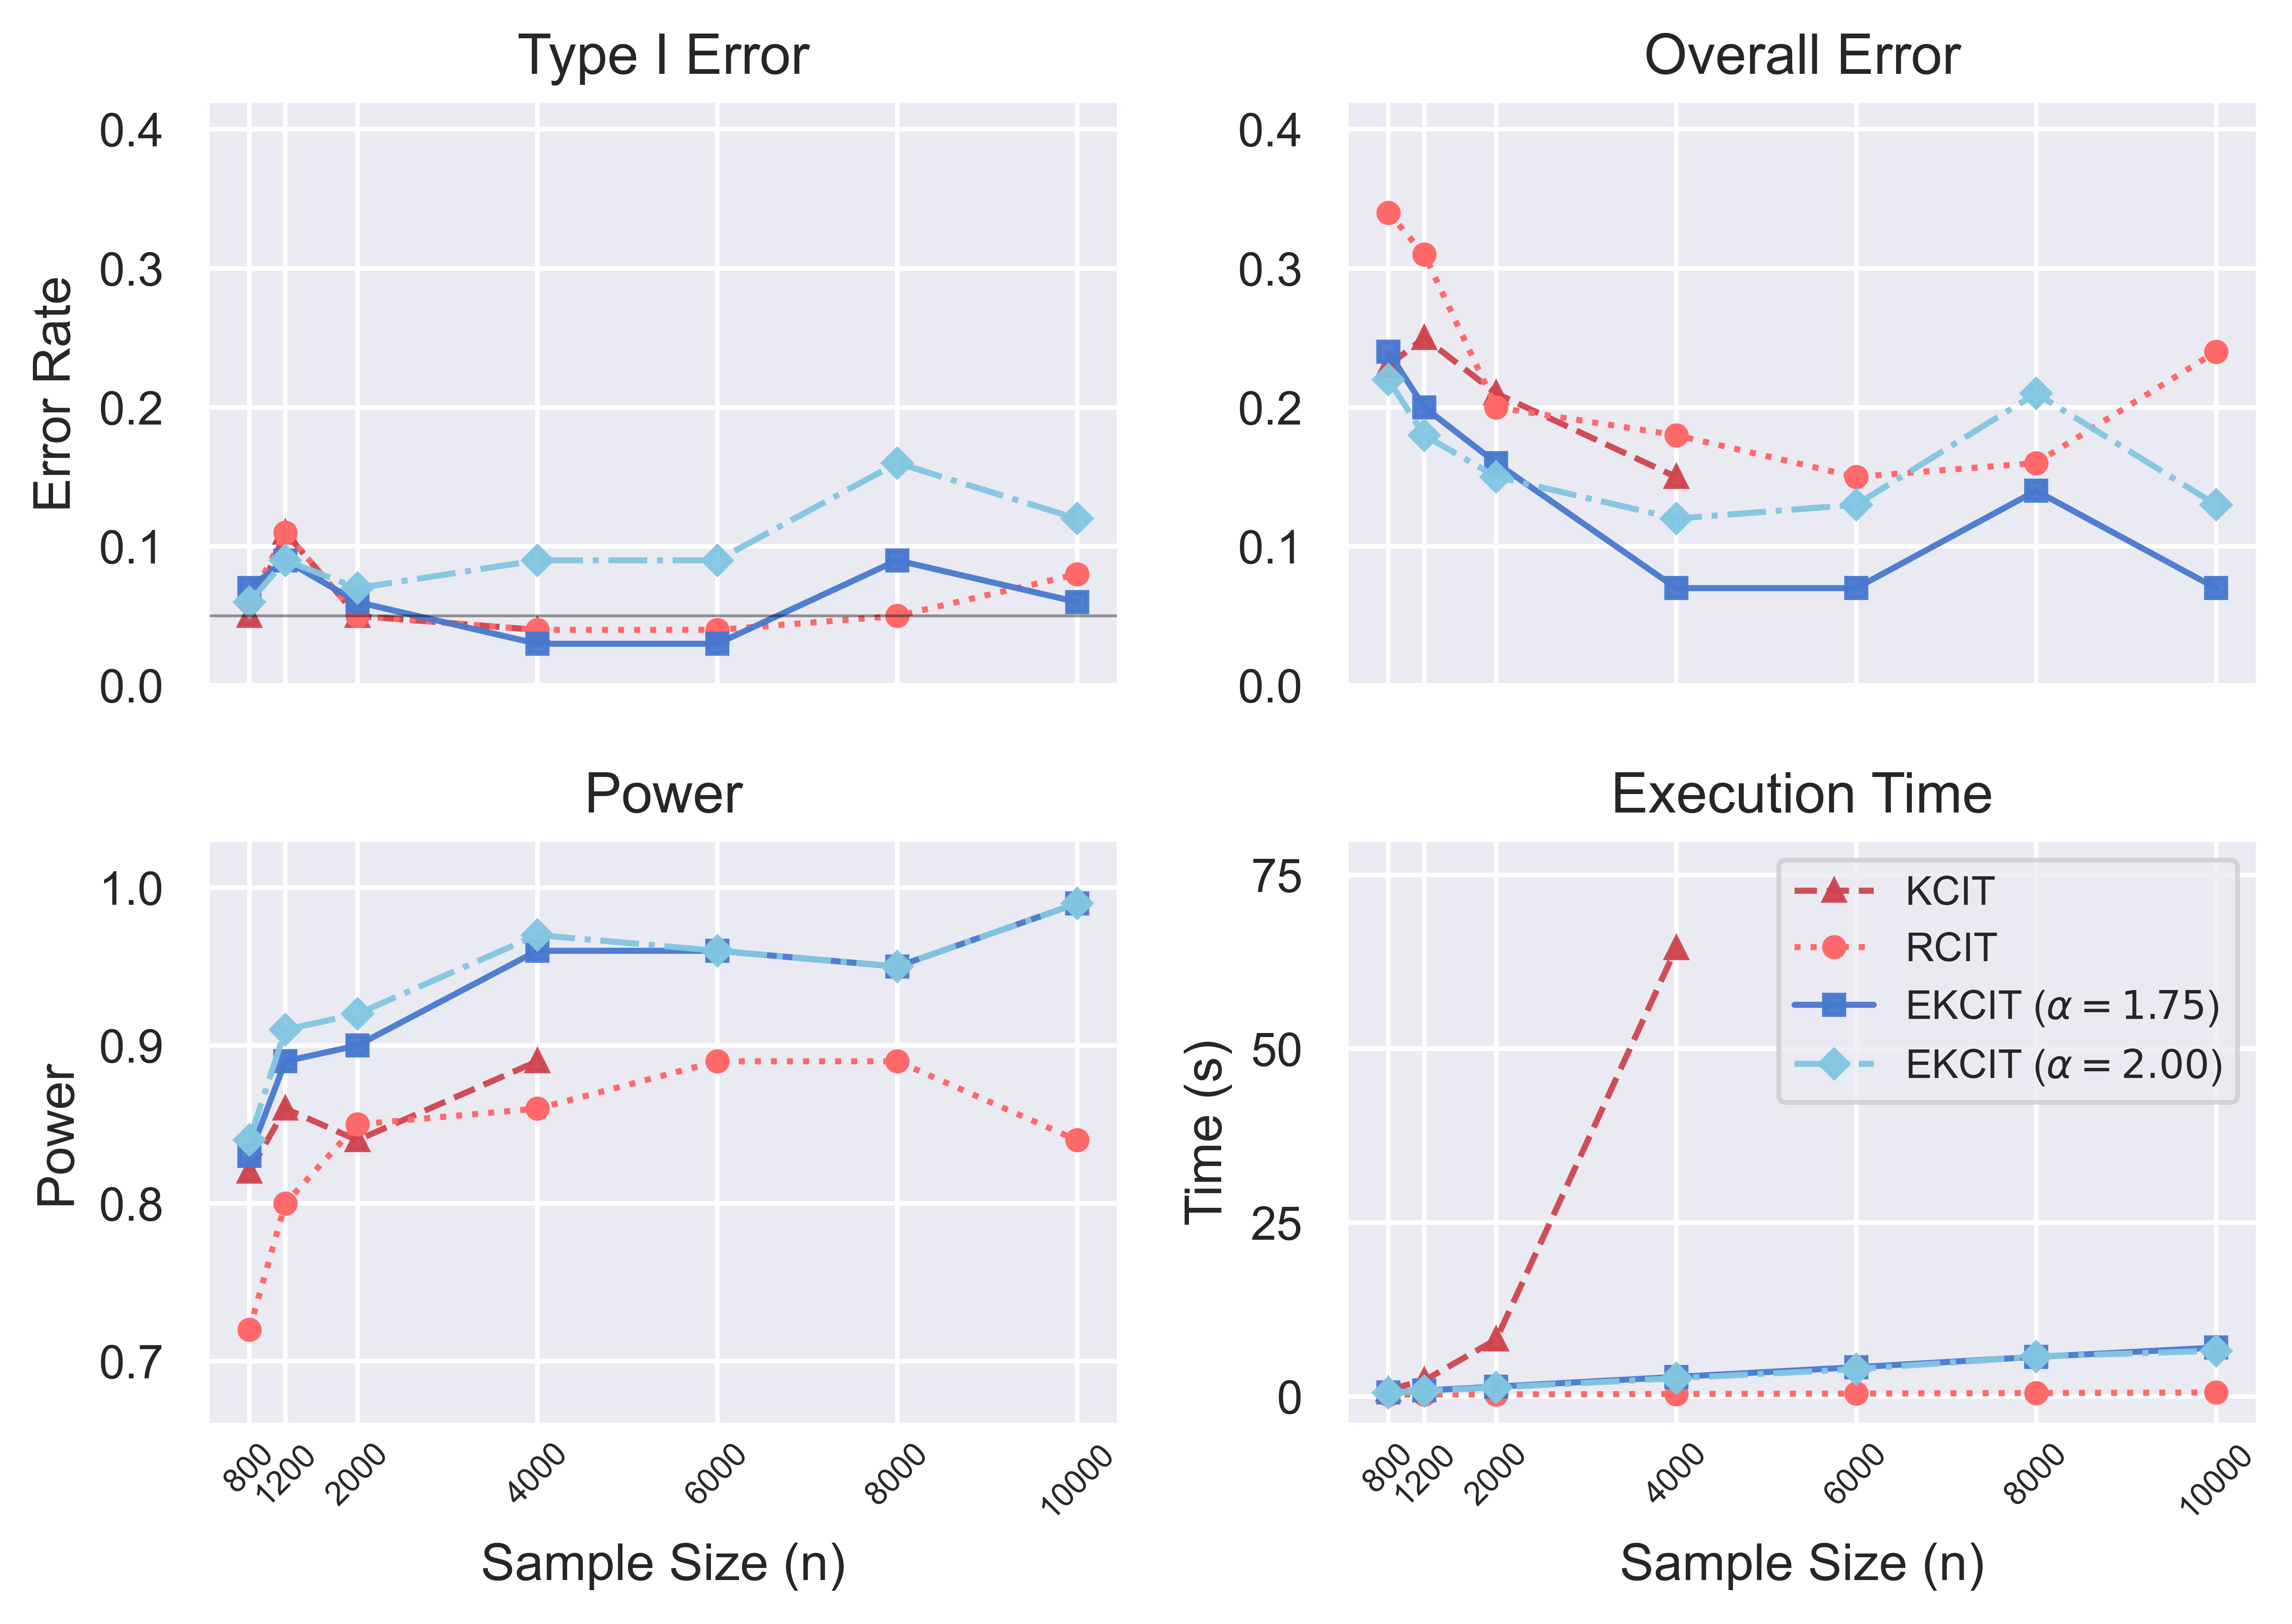

In [227]:
sns.set()
show_results(std1T, ensembles, n_list)